# Figure S8: human inulin study inferred assemblages
This script renders supplementary figure S8, giving all assemblages inferred on the human inulin dataset and their proportions over time

### Before you start
This notebook assumes the analysis on the human inulin dataset have been run and results are located in `MCSPACE_paper/results/analysis/human_inulin`. Refer to the README in `scripts/analysis` for the analysis pipeline and more details.

In [1]:
from pathlib import Path
import pandas as pd
from mcspace.utils import pickle_load
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from mcspace.visualization import render_assemblages, render_assemblage_proportions, export_association_networks_to_cytoscape
import matplotlib.colors as mcolors
import mcspace.vis_tools as vis
import matplotlib.patches as mpatches

In [2]:
%matplotlib inline 

In [3]:
# change font to arial
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['svg.fonttype'] = 'none'

# Paths

In [4]:
basepath = Path("./")
rootpath = Path("../../")
datapath = rootpath / "MCSPACE_paper" / "datasets"

outpath = basepath / "supplemental_figures"
outpath.mkdir(exist_ok=True, parents=True)

In [24]:
treepath = datapath / "human_inulin_perturbed" / "output" 
treefile = "newick_tree_query_reads.nhx"


In [6]:
resultpath = rootpath / "MCSPACE_paper" / "results" / "analysis" / "human_inulin"

In [7]:
results = pickle_load(resultpath / "results.pkl")

## Fix taxonomy (add genus to species names...)

In [8]:
theta = results["assemblages"]

In [9]:
theta.head()

,,,,,,,,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42
Otu,Domain,Phylum,Order,Class,Family,Genus,Species,,,,,,,,,,,,,,,,,,,,,
Otu15,Bacteria,Firmicutes,Acidaminococcales,Negativicutes,Acidaminococcaceae,Acidaminococcaceae,na,5.402044e-10,4.566318e-10,7.087878e-10,6.761923e-10,1.011743e-02,4.154032e-03,6.815317e-10,6.337994e-04,9.157046e-10,1.710469e-08,...,2.753280e-09,9.905521e-10,0.021291,1.765768e-09,6.548908e-08,1.364419e-09,1.392650e-09,8.368565e-04,6.111267e-03,5.314949e-04
Otu81,Bacteria,Firmicutes,Clostridia UCG-014,Clostridia,na,na,na,5.993243e-10,1.099598e-09,1.125636e-09,7.870884e-10,7.910649e-10,8.462128e-10,3.655898e-09,3.735886e-05,1.654418e-03,1.180011e-03,...,3.719087e-04,4.524394e-04,0.012844,2.875757e-09,6.175879e-08,1.043484e-03,1.019878e-02,1.219343e-09,7.642739e-05,1.901888e-09
Otu109,Bacteria,Firmicutes,Lachnospirales,Clostridia,Lachnospiraceae,na,na,1.223170e-09,1.269643e-09,4.571187e-05,9.508778e-10,2.440368e-09,6.747477e-03,5.486141e-10,2.234653e-09,7.103887e-10,1.271684e-09,...,1.121878e-03,6.744422e-10,0.002810,1.796872e-09,1.280230e-07,8.011021e-10,3.995764e-02,2.639358e-10,2.562632e-03,1.772351e-02
Otu52,Bacteria,Firmicutes,Lachnospirales,Clostridia,Lachnospiraceae,Lachnospiraceae,UCG-001,1.028309e-03,7.469828e-10,3.630410e-06,9.249437e-10,1.098402e-09,1.015128e-02,1.650840e-04,1.012947e-03,1.530720e-09,1.035948e-04,...,4.415186e-04,2.446390e-09,0.003712,2.437058e-03,1.112596e-03,3.667009e-03,1.304979e-09,2.938695e-09,9.657782e-10,3.487537e-04
Otu75,Bacteria,Actinobacteriota,Coriobacteriales,Coriobacteriia,Eggerthellaceae,na,na,7.534840e-04,2.488229e-05,8.029230e-10,9.289624e-10,1.575106e-09,7.921071e-10,7.187091e-10,6.652289e-10,1.214494e-04,9.285728e-04,...,8.868053e-03,4.765187e-04,0.002964,5.740490e-09,1.374571e-07,8.202014e-10,3.937318e-03,3.687582e-03,2.894270e-04,6.012646e-04


In [10]:
names=['Otu', 'Domain', 'Phylum', 'Order', 'Class', 'Family', 'Genus', 'Species']

new_index = [
    (otu, domain, phylum, order, class_, family, genus, f"{genus} {species}" if species != "na" else "na")
    for otu, domain, phylum, order, class_, family, genus, species in theta.index
]

In [11]:
theta.index = pd.MultiIndex.from_tuples(new_index, names=names)

In [12]:
theta.head()

,,,,,,,,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42
Otu,Domain,Phylum,Order,Class,Family,Genus,Species,,,,,,,,,,,,,,,,,,,,,
Otu15,Bacteria,Firmicutes,Acidaminococcales,Negativicutes,Acidaminococcaceae,Acidaminococcaceae,na,5.402044e-10,4.566318e-10,7.087878e-10,6.761923e-10,1.011743e-02,4.154032e-03,6.815317e-10,6.337994e-04,9.157046e-10,1.710469e-08,...,2.753280e-09,9.905521e-10,0.021291,1.765768e-09,6.548908e-08,1.364419e-09,1.392650e-09,8.368565e-04,6.111267e-03,5.314949e-04
Otu81,Bacteria,Firmicutes,Clostridia UCG-014,Clostridia,na,na,na,5.993243e-10,1.099598e-09,1.125636e-09,7.870884e-10,7.910649e-10,8.462128e-10,3.655898e-09,3.735886e-05,1.654418e-03,1.180011e-03,...,3.719087e-04,4.524394e-04,0.012844,2.875757e-09,6.175879e-08,1.043484e-03,1.019878e-02,1.219343e-09,7.642739e-05,1.901888e-09
Otu109,Bacteria,Firmicutes,Lachnospirales,Clostridia,Lachnospiraceae,na,na,1.223170e-09,1.269643e-09,4.571187e-05,9.508778e-10,2.440368e-09,6.747477e-03,5.486141e-10,2.234653e-09,7.103887e-10,1.271684e-09,...,1.121878e-03,6.744422e-10,0.002810,1.796872e-09,1.280230e-07,8.011021e-10,3.995764e-02,2.639358e-10,2.562632e-03,1.772351e-02
Otu52,Bacteria,Firmicutes,Lachnospirales,Clostridia,Lachnospiraceae,Lachnospiraceae,Lachnospiraceae UCG-001,1.028309e-03,7.469828e-10,3.630410e-06,9.249437e-10,1.098402e-09,1.015128e-02,1.650840e-04,1.012947e-03,1.530720e-09,1.035948e-04,...,4.415186e-04,2.446390e-09,0.003712,2.437058e-03,1.112596e-03,3.667009e-03,1.304979e-09,2.938695e-09,9.657782e-10,3.487537e-04
Otu75,Bacteria,Actinobacteriota,Coriobacteriales,Coriobacteriia,Eggerthellaceae,na,na,7.534840e-04,2.488229e-05,8.029230e-10,9.289624e-10,1.575106e-09,7.921071e-10,7.187091e-10,6.652289e-10,1.214494e-04,9.285728e-04,...,8.868053e-03,4.765187e-04,0.002964,5.740490e-09,1.374571e-07,8.202014e-10,3.937318e-03,3.687582e-03,2.894270e-04,6.012646e-04


In [13]:
results["assemblages"] = theta

In [14]:
bf = results['perturbation_bayes_factors']
print(np.amax(bf))

3.0916824


## Create figure

In [15]:
thetadf = results['assemblages']
betadf = results['assemblage_proportions']
bfdf = results['perturbation_bayes_factors']

In [16]:
taxonomy = thetadf.reset_index()[names]

In [17]:
taxonomy.set_index('Otu', inplace=True)

In [18]:
ncomm_max = 90
notu_max = 170

tree_ratio = 0.1
gap_ratio = 0.17

lgd_ratio = 0.07
lgd_gap = 0.05

In [19]:
notus, ncomm = thetadf.shape
ntime = len(betadf['Time'].unique())
nsubj = 1

In [20]:
otu_threshold = 0.05
otu_sub = thetadf.index[(thetadf>otu_threshold).any(axis=1)].get_level_values("Otu")

beta_order = thetadf.columns

In [21]:
taxonomy.head()

,Domain,Phylum,Order,Class,Family,Genus,Species
Otu,,,,,,,
Otu15,Bacteria,Firmicutes,Acidaminococcales,Negativicutes,Acidaminococcaceae,Acidaminococcaceae,na
Otu81,Bacteria,Firmicutes,Clostridia UCG-014,Clostridia,na,na,na
Otu109,Bacteria,Firmicutes,Lachnospirales,Clostridia,Lachnospiraceae,na,na
Otu52,Bacteria,Firmicutes,Lachnospirales,Clostridia,Lachnospiraceae,Lachnospiraceae,Lachnospiraceae UCG-001
Otu75,Bacteria,Actinobacteriota,Coriobacteriales,Coriobacteriia,Eggerthellaceae,na,na


In [22]:
theta_vmin=-2.0
theta_vmax=0

theta_cmap = mcolors.LinearSegmentedColormap.from_list('theta cmap', 
                                             [(0,'lightyellow'),
                                              (0.7, 'yellowgreen'),
                                              (1,    'green')], N=256)
theta_cmap.set_under('white')

theta_norm = norm = mpl.colors.Normalize(vmin=theta_vmin, vmax=theta_vmax)

original tree size: 762
pruned tree size: 30


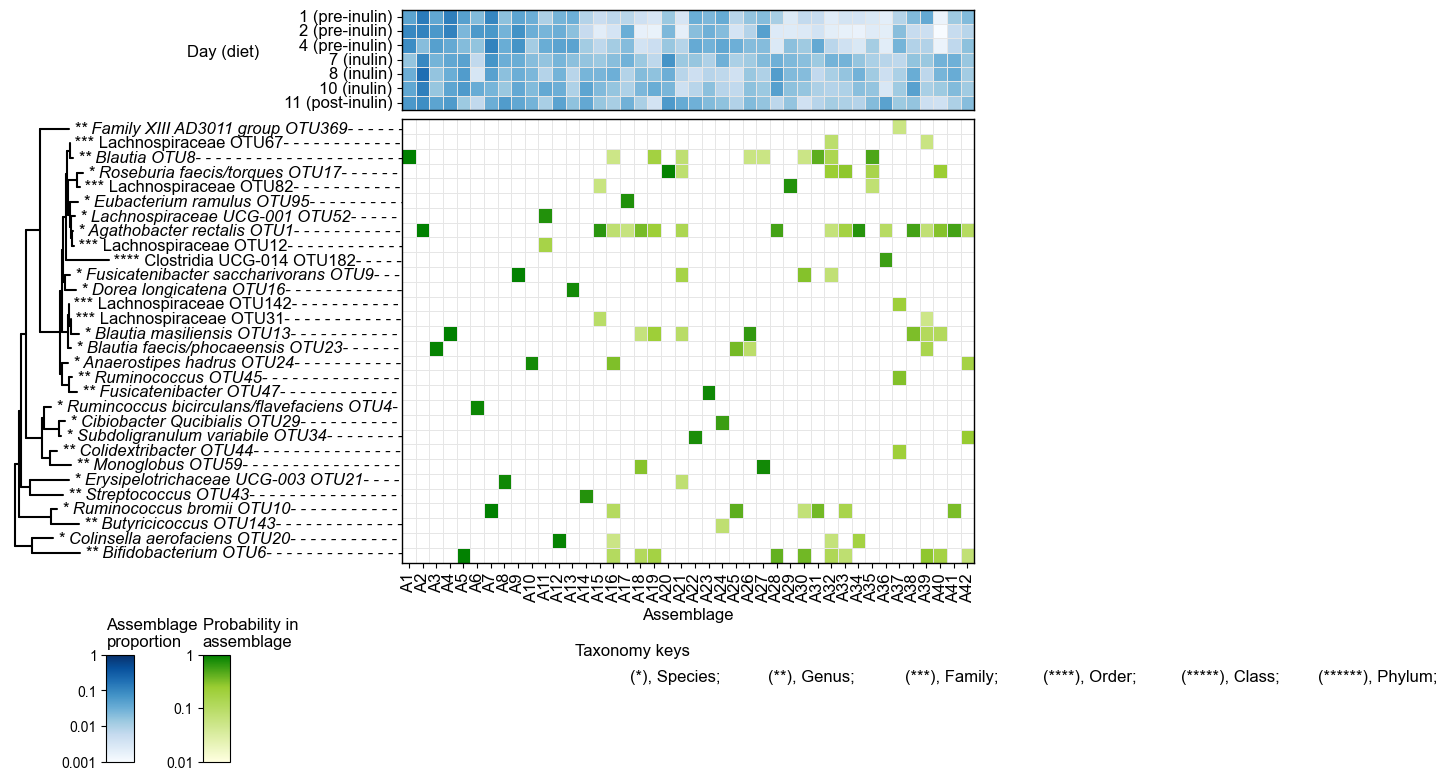

In [25]:
scale=2
fontsize = 12
subfontsize = 12
tree_text_len = 50

# set aspect ratios
# add buffers so scales always same?
hratios = [1.6*ntime/notu_max, notus/notu_max, lgd_gap, lgd_ratio]
hratios.append(1.0 - (nsubj*ntime/notu_max) - (notus/notu_max)) # buffer?
wratios = [tree_ratio, gap_ratio, ncomm/ncomm_max, 1.0-gap_ratio-tree_ratio-(ncomm/ncomm_max)]

# create figure
fig = plt.figure(figsize=(8.5*scale,11.5*scale))
gs = fig.add_gridspec(nrows=1+2+2,ncols=4,
                    height_ratios=hratios,
                      width_ratios=wratios,
                    wspace=0.1,
                     hspace=0.02)

# create subplots, get axes
ax_beta = fig.add_subplot(gs[0,2])
ax_tree = fig.add_subplot(gs[1,0])
# ax_theta = fig.add_subplot(gs[1,2])
# squish to center lines...
squish_ratio = 0.005
squish_hspace = 0
gs_theta = gs[1,2].subgridspec(3,1, height_ratios=[squish_ratio,1,squish_ratio], hspace=squish_hspace)
ax_theta = fig.add_subplot(gs_theta[1,0])

# for legend...
gs_lgd = gs[-2,:-1].subgridspec(3,5, wspace=0.5, width_ratios=[0.1,0.1,0.1,2,0.2])
ax_beta_lgd = fig.add_subplot(gs_lgd[:,1])
ax_theta_lgd = fig.add_subplot(gs_lgd[:,2])
ax_taxa_lgd = fig.add_subplot(gs_lgd[:,3])

# plot assemblage proportions
ax_beta = vis.plot_subject_proportions_timeseries(ax_beta, betadf, subj='H11', vmin=-3, order=beta_order)
ax_beta.set_xticks([])
yticklabels = ['1 (pre-inulin)', '2 (pre-inulin)', '4 (pre-inulin)', '7 (inulin)', '8 (inulin)', '10 (inulin)', '11 (post-inulin)']
ax_beta.set_yticklabels(yticklabels, rotation=0, fontsize=subfontsize)
ax_beta.set_ylabel("Day (diet)", rotation=0, labelpad=70, ha='left', fontsize=fontsize)
ax_beta.set_xlabel("")
ax_beta = vis.add_border(ax_beta)

# get data subsets
taxa = taxonomy.reset_index()
taxa.rename(columns={'OTU':'Otu'}, inplace=True)
taxa_subset = taxa.set_index("Otu").loc[otu_sub,:]
tree = vis.get_pruned_tree(treepath, treefile, taxa_subset, temppath=Path("./_tmp_sub"), upper=False)

# plot tree
ax_tree, otu_order = vis.plot_phylo_tree(ax_tree, tree, taxonomy, fontsize=fontsize, text_len=tree_text_len)

# plot assemblages
thetadf2 = thetadf.copy()
thetadf2[thetadf2<otu_threshold] = 0
ax_theta=vis.plot_assemblages(ax_theta, thetadf2, otu_order, beta_order, cmap=theta_cmap, 
                          vmin=theta_vmin, vmax=theta_vmax) #, cmap=extended_cmap, vmin=-3) #'Greens')
ax_theta.set_xlabel("Assemblage", fontsize=fontsize)
ax_theta.set_ylabel("")
ax_theta.set_xticklabels(ax_theta.get_xticklabels(), rotation=90, fontsize=subfontsize)
ax_theta = vis.add_border(ax_theta)

# plot legend
norm = theta_norm #mpl.colors.Normalize(vmin=theta_vmin, vmax=theta_vmax)
ax_theta_lgd=mpl.colorbar.ColorbarBase(ax_theta_lgd, cmap=theta_cmap, norm=norm, orientation='vertical')
ax_theta_lgd.ax.set_yticks([0,-1,-2])
ax_theta_lgd.ax.set_yticklabels([1,0.1,0.01]) #,0.001r'$10^{0}$',r'$10^{-1}$',r'$10^{-2}$'])
ax_theta_lgd.ax.yaxis.set_ticks_position('left')
ax_theta_lgd.ax.yaxis.set_label_position('left')
ax_theta_lgd.ax.set_title("Probability in\nassemblage", loc='left')

norm = mpl.colors.Normalize(vmin=-3, vmax=-0)
ax_beta_lgd=mpl.colorbar.ColorbarBase(ax_beta_lgd, cmap="Blues", norm=norm, orientation='vertical')
ax_beta_lgd.ax.set_yticks([0,-1,-2,-3])
ax_beta_lgd.ax.set_yticklabels([1,0.1,0.01,0.001]) #r'$10^{0}$',r'$10^{-1}$',r'$10^{-2}$'])
ax_beta_lgd.ax.yaxis.set_ticks_position('left')
ax_beta_lgd.ax.yaxis.set_label_position('left')
ax_beta_lgd.ax.set_title("Assemblage\nproportion", loc='left')


lgd_xpos=0.5
lgd_ypos=1.0
indent_xpos=lgd_xpos+0.1
dy=0.25
lgd_fontsize=12

levels = ['Species','Genus', 'Family', 'Order', 'Class', 'Phylum', ] #'Kingdom']      
level_dict = {'Species': '*', 'Genus': '**', 'Family': '***',
              'Order': '****', 'Class': '*****', 'Phylum': '******'} #, 'Kingdom': '*******'}
    
ax_taxa_lgd.text(lgd_xpos,lgd_ypos,"Taxonomy keys", fontsize=lgd_fontsize)
for i,level in enumerate(levels):
    ax_taxa_lgd.text(indent_xpos + (i)*dy, lgd_ypos - dy, f"({level_dict[level]}), {level};", fontsize=lgd_fontsize)
ax_taxa_lgd=vis.remove_border(ax_taxa_lgd)

plt.savefig(outpath / "figure_S8_human_inulin_assemblages.svg", bbox_inches="tight")